In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Print table results for measurement
for row in session.query(measurement.id, measurement.tobs, measurement.date, measurement.prcp, measurement.station).all():
    print(row)

(1, 65.0, '2010-01-01', 0.08, 'USC00519397')
(2, 63.0, '2010-01-02', 0.0, 'USC00519397')
(3, 74.0, '2010-01-03', 0.0, 'USC00519397')
(4, 76.0, '2010-01-04', 0.0, 'USC00519397')
(5, 73.0, '2010-01-06', None, 'USC00519397')
(6, 70.0, '2010-01-07', 0.06, 'USC00519397')
(7, 64.0, '2010-01-08', 0.0, 'USC00519397')
(8, 68.0, '2010-01-09', 0.0, 'USC00519397')
(9, 73.0, '2010-01-10', 0.0, 'USC00519397')
(10, 64.0, '2010-01-11', 0.01, 'USC00519397')
(11, 61.0, '2010-01-12', 0.0, 'USC00519397')
(12, 66.0, '2010-01-14', 0.0, 'USC00519397')
(13, 65.0, '2010-01-15', 0.0, 'USC00519397')
(14, 68.0, '2010-01-16', 0.0, 'USC00519397')
(15, 64.0, '2010-01-17', 0.0, 'USC00519397')
(16, 72.0, '2010-01-18', 0.0, 'USC00519397')
(17, 66.0, '2010-01-19', 0.0, 'USC00519397')
(18, 66.0, '2010-01-20', 0.0, 'USC00519397')
(19, 69.0, '2010-01-21', 0.0, 'USC00519397')
(20, 67.0, '2010-01-22', 0.0, 'USC00519397')
(21, 67.0, '2010-01-23', 0.0, 'USC00519397')
(22, 71.0, '2010-01-24', 0.01, 'USC00519397')
(23, 67.0, '20

In [12]:
#Print table results for station
for row in session.query(station.longitude, station.name, station.id, station.elevation, station.latitude, station.station).all():
    print(row)

(-157.8168, 'WAIKIKI 717.2, HI US', 1, 3.0, 21.2716, 'USC00519397')
(-157.8015, 'KANEOHE 838.1, HI US', 2, 14.6, 21.4234, 'USC00513117')
(-157.8374, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 3, 7.0, 21.5213, 'USC00514830')
(-157.9751, 'PEARL CITY, HI US', 4, 11.9, 21.3934, 'USC00517948')
(-158.0111, 'UPPER WAHIAWA 874.3, HI US', 5, 306.6, 21.4992, 'USC00518838')
(-157.71139, 'WAIMANALO EXPERIMENTAL FARM, HI US', 6, 19.5, 21.33556, 'USC00519523')
(-157.84888999999998, 'WAIHEE 837.5, HI US', 7, 32.9, 21.45167, 'USC00519281')
(-157.9992, 'HONOLULU OBSERVATORY 702.2, HI US', 8, 0.9, 21.3152, 'USC00511918')
(-157.8025, 'MANOA LYON ARBO 785.2, HI US', 9, 152.4, 21.3331, 'USC00516128')


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(last_date)

('2017-08-23',)


In [14]:
#Alterative method to calculate preciptation for the last 12 months 
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
past_yr = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
climate_df = pd.DataFrame(past_yr, columns=['date', 'prcp']).sort_values(by='date')
climate_df.set_index('date', inplace=True)
climate_df.head(10)



,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,1.45
2016-08-24,2.15


C:\Users\dryas\AppData\Local\Temp\ipykernel_12884\891608559.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  climate_df.plot(figsize=(15, 7),


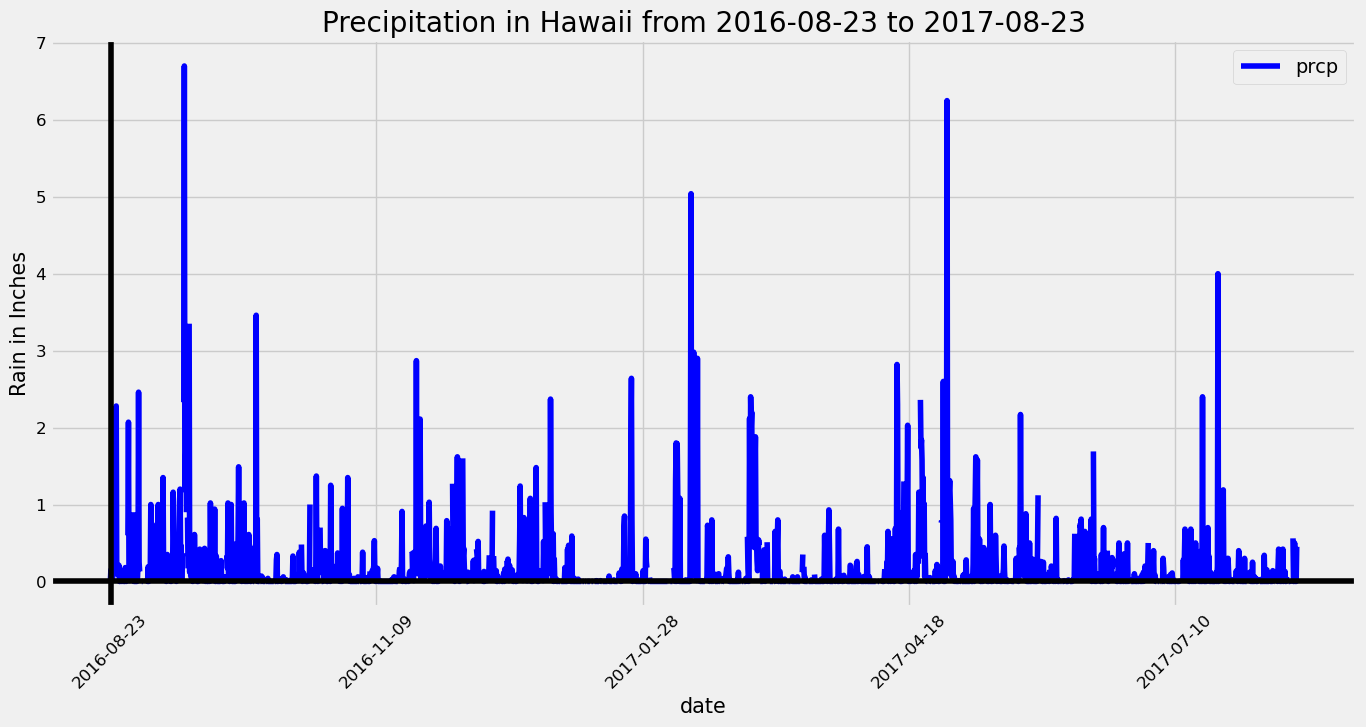

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_df.plot(figsize=(15, 7),
    sort_columns=True, 
    rot=45, 
    use_index=True, 
    title=(f'Precipitation in Hawaii from 2016-08-23 to 2017-08-23'),
    legend=True,
    fontsize=12,
    grid=True,
    color='blue')

plt.axvline(x=0.5, color="black")
plt.axhline(color="black")
plt.xlabel('date', fontsize=15)
plt.ylabel('Rain in Inches', fontsize=15)

plt.savefig(f'Precipitation in Hawaii from Date range 2016-08-23 to 2017-08-23')
plt.tight_layout
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
climate_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:

# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(station.id)).all()

print(f"total stations are {total_station}")

total stations are [(9,)]


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = engine.execute('SELECT station, COUNT(station) FROM measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc')
for stations in active_stations:
    print(stations)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


# Finding
Which station id has the greatest number of observations?

 Station ID 'USC00519281' has the greatest number of observations with a total count of 2772.

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

low_temp = engine.execute('SELECT min(tobs) FROM measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for lowest in low_temp:
    print(lowest)

high_temp = engine.execute('SELECT max(tobs) FROM measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for highest in high_temp:
    print(highest)
    
avg_temp = engine.execute('SELECT avg(tobs) FROM measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for avg in avg_temp:
    print(avg)

    print(f"Lowest temperature {lowest} Highest temperature {highest} Average temperature {avg}")

(54.0,)
(85.0,)
(71.66378066378067,)
Lowest temperature (54.0,) Highest temperature (85.0,) Average temperature (71.66378066378067,)


In [24]:
#Create a dataframe for the most active station, and determine the temperatures for the last 12 months
year_temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >'2016-08-23').filter(measurement.date < '2017-08-23').filter(measurement.station == "USC00519281").\
    group_by(measurement.tobs, measurement.date).\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
temp_df = pd.DataFrame(year_temp, columns=['date', 'temp']).sort_values(by='date')
temp_df.set_index('date', inplace=True)
temp_df.head(10)

,temp
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


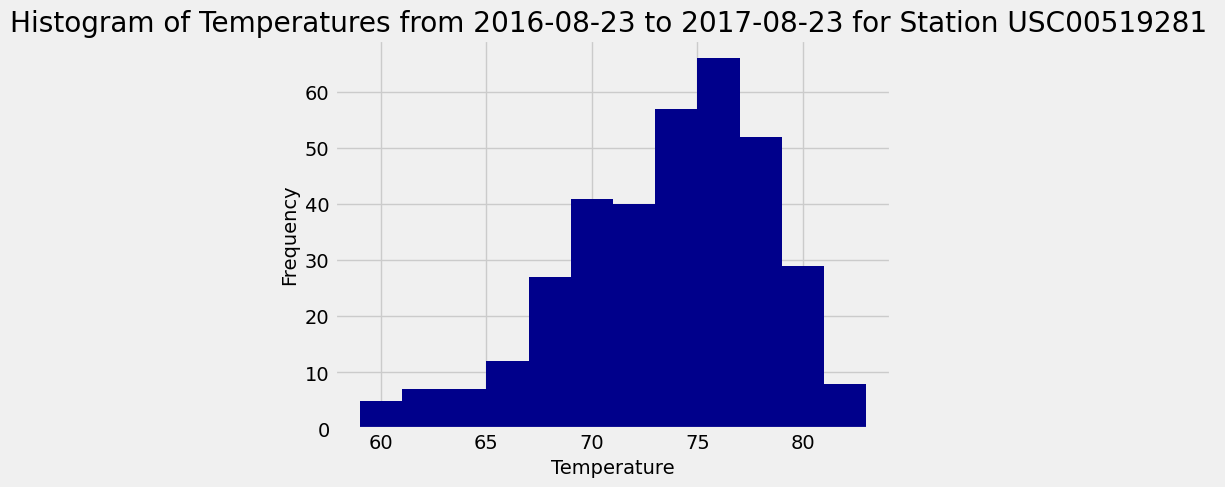

In [31]:
# Using the most active station id plot the results of the temp for the last 12 months as a histogram

temp_df.hist(column='temp', bins=12, color='darkblue')

# Set the labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperatures from 2016-08-23 to 2017-08-23 for Station USC00519281 ')
#Save figure
plt.savefig(f'Temperature from 2016-08-23 to 2017-08-23 for station USC00519281  ')
# Display the histogram
plt.show()



# Close Session

In [30]:
# Close Session
session.close()